# Installing WordCloud for a visualization of words used in the cluster

In [3]:
!pip install wordcloud

    100% |################################| 174kB 2.6MB/s 
  Running setup.py bdist_wheel for wordcloud ... - \ | / done
  Stored in directory: /gpfs/fs01/user/saa8-5843b0fd5f79d7-67415d73dbb5/.cache/pip/wheels/29/9a/a9/86dcbbd5a7b6ace25887e4351a0136ea6dfcc0dd7de0a51357
Successfully built wordcloud


# Reading in the now labeled training data and adding a column with the words in the comment

In [1]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
def set_hadoop_config(credentials):
    prefix = "fs.swift.service." + credentials['name'] 
    hconf = sc._jsc.hadoopConfiguration()
    hconf.set(prefix + ".auth.url", credentials['auth_url']+'/v3/auth/tokens')
    hconf.set(prefix + ".auth.endpoint.prefix", "endpoints")
    hconf.set(prefix + ".tenant", credentials['project_id'])
    hconf.set(prefix + ".username", credentials['user_id'])
    hconf.set(prefix + ".password", credentials['password'])
    hconf.setInt(prefix + ".http.port", 8080)
    hconf.set(prefix + ".region", credentials['region'])
    hconf.setBoolean(prefix + ".public", True)
credentials = {
    "auth_url": "https://identity.open.softlayer.com",
    "project": "XXXXXXXX",
    "project_id": "XXXXXXXX",
    "region": "dallas",
    "user_id": "XXXXXXXX",
    "username": "XXXXXXXX",
    "password": "XXXXXXXX.",
    "domainId": "XXXXXXXX",
    "domainName": "XXXXXXXX",
    "name": "keystone"
}

set_hadoop_config(credentials)
df = sqlContext.read.load("swift://XXXXXXXX.keystone/commentClusters", format="parquet")
cleanUp = udf(lambda s: " ".join(list(s)), StringType())
df = df.withColumn('cleanWords', cleanUp(df.noStopWords))
df.cache()

# Importing the WordCloud library and pyplot from Matplotlib

In [4]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Let's look at 10 other examples from that cluster

In [12]:
for comment in df.filter("prediction = 185").limit(10).select("lowerText").collect():
    print comment

Row(lowerText=u'simple. the navy does war games all the time. it might mess them up if all you have to do to know where one of them is is look at a chart.')
Row(lowerText=u"two things.\n\n- a lot of the community is filled with ignorant dickheaded adolescent boys who haven't matured yet. it makes us gamers look bad.\n\n- when people treat games as if they are a pointless time sink. games actually have a lot of benefits.")
Row(lowerText=u"i'm the opposite; i'm fairly interested in how games are made. in fact, i'm dying to see raw footage of some gta v cutscenes. i'm surprised that hasn't surfaced. ")
Row(lowerText=u"i've established a relationship with a girl that understands i have hobbies that don't always include her. one of them is gaming. if i want to play games she just does something else.")
Row(lowerText=u"this annoys me the most,  the people who watch hours and hours of television and movies every day but say games are a waste of time. \n\ni'd rather be engaged in an interactiv

# And a wordcloud of that cluster

(-0.5, 399.5, 199.5, -0.5)

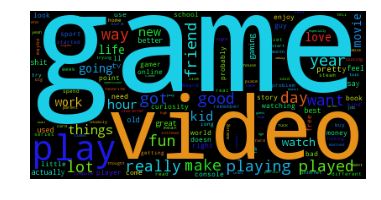

In [8]:
words = " ".join(df.filter("prediction = 185").\
                 select("cleanWords").rdd.map(lambda r: r.cleanWords).collect())
wordcloud = WordCloud().generate(words)

plt.imshow(wordcloud)
plt.axis("off")